In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Github_Data_2019_ready_for_text_analysis.csv')

In [3]:
df.head()

,Unnamed: 0,id,node_id,name,full_name,private,html_url,description,fork,url,...,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license,lang,clean
0,0,177736533,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,996icu/996.ICU,False,https://github.com/996icu/996.ICU,Repo for counting stars and contributing. Pres...,False,https://api.github.com/repos/996icu/996.ICU,...,User,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN,en,repo counting stars contributing press f pay r...
1,1,189621607,MDEwOlJlcG9zaXRvcnkxODk2MjE2MDc=,docs,github/docs,False,https://github.com/github/docs,The open-source repo for docs.github.com,False,https://api.github.com/repos/github/docs,...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN,en,open-source repo docs.github.com
2,2,228683419,MDEwOlJlcG9zaXRvcnkyMjg2ODM0MTk=,it-cert-automation-practice,google/it-cert-automation-practice,False,https://github.com/google/it-cert-automation-p...,Google IT Automation with Python Professional ...,False,https://api.github.com/repos/google/it-cert-au...,...,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN,en,google automation python professional certific...
3,3,212094940,MDEwOlJlcG9zaXRvcnkyMTIwOTQ5NDA=,DO180-apps,RedHatTraining/DO180-apps,False,https://github.com/RedHatTraining/DO180-apps,DO180 Repository for Sample Applications,False,https://api.github.com/repos/RedHatTraining/DO...,...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN,en,do180 repository sample applications
4,4,177216275,MDEwOlJlcG9zaXRvcnkxNzcyMTYyNzU=,mslearn-tailspin-spacegame-web,MicrosoftDocs/mslearn-tailspin-spacegame-web,False,https://github.com/MicrosoftDocs/mslearn-tails...,Code used in Microsoft Learn modules to suppor...,False,https://api.github.com/repos/MicrosoftDocs/msl...,...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN,en,code used microsoft learn modules support azur...


# Numerical Data

In [4]:
df[['watchers_count', 'size', 'forks_count', 'open_issues']].describe()

,watchers_count,size,forks_count,open_issues
count,545.000000,5.450000e+02,545.000000,545.000000
mean,5197.201835,7.076932e+04,1433.537615,181.462385
std,12558.667296,2.627305e+05,2043.851287,1002.965710
min,0.000000,0.000000e+00,485.000000,0.000000
25%,410.000000,1.120000e+03,615.000000,6.000000
50%,2662.000000,9.378000e+03,854.000000,26.000000
75%,6330.000000,3.996800e+04,1396.000000,103.000000
max,257508.000000,3.979547e+06,21342.000000,16812.000000


# Top technologies

In [5]:
# Identifying the most popular phrases related to technologies by 
# focusing on most frequent bigrams

import nltk         
from nltk.collocations import *      #implements n-gram search tools

In [6]:
list_documents = df['clean'].apply(lambda x : x.split()).tolist()
# here list_documents is a list of lists containing words in the column 'clean'

In [7]:
# finding bigrams document-wise and avoiding corpus wise by using from_documents

bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_documents)

In [8]:
bigram_finder.apply_freq_filter(3)  #considering bigrams with at least three occurences

In [9]:
bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 20)
# we get top 20 bigrams according to raw_freq measure

In [10]:
# now we find scores of these bigrams i.e. (here) the frequency corresponding to each

scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [11]:
ngram = list(bigram_finder.ngram_fd.items())   # bigram_finder.ngram_fd is a dictionary

In [12]:
ngram.sort(key = lambda item: item[-1], reverse = True)

In [13]:
ngram[:10]

[(('deep', 'learning'), 24),
 (('open', 'source'), 20),
 (('machine', 'learning'), 14),
 (('starter', 'code'), 14),
 (('guided', 'project'), 14),
 (('data', 'science'), 10),
 (('github', 'actions'), 8),
 (('complete', 'flutter'), 8),
 (('best', 'practices'), 7),
 (('azure', 'devops'), 6)]

In [14]:
frequency = [(' '.join(k), v) for k, v in ngram]

# this just joins the tuple containing bigrams

In [15]:
df = pd.DataFrame(frequency)

In [16]:
df.head()

,0,1
0,deep learning,24
1,open source,20
2,machine learning,14
3,starter code,14
4,guided project,14


In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.style.use('ggplot')

In [19]:
df.set_index([0], inplace = True)
df.head()

,1
0,
deep learning,24
open source,20
machine learning,14
starter code,14
guided project,14


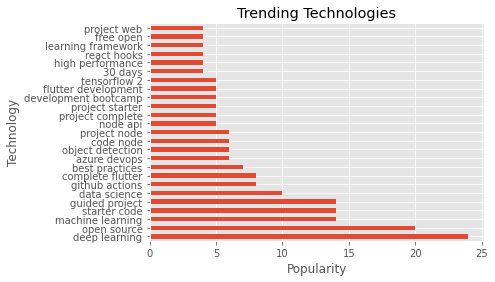

In [20]:
df.sort_values(by = [1], ascending = False).head(25).plot(kind = 'barh')
plt.title('Trending Technologies')
plt.ylabel('Technology')
plt.xlabel('Popularity')
plt.legend().set_visible(False)
plt.show()